# Análisis de Ventas

## Introducción

Este proyecto tiene como objetivo analizar el comportamiento de compra de clientes
en un contexto de retail/e-commerce, utilizando datos transaccionales reales.

A partir de un dataset que incluye información sobre compras, descuentos,
programas de fidelización, devoluciones y experiencia del cliente, se busca
extraer insights de negocio que ayuden a comprender:

- El impacto del programa de fidelización en el ticket promedio
- Efectividad del programa de fidelización
- Conclusión final
- Recomendaciones
- Limitaciones

El análisis se realizó siguiendo buenas prácticas de análisis de datos,
incluyendo la preservación de datos crudos, la creación de una capa de datos
limpios (`sales_clean`) y el uso combinado de SQL y Python para el análisis
exploratorio y la obtención de conclusiones.


## Herramientas
- Python
- pandas
- SQLite
- SQL
- matplotlib


Primero, importar las librerias necesarias y sqlite3 para crear la BD para realizar consultas:

In [49]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Carga de datos
Los datos se cargan desde un archivo CSV descargado de Kaggle.
Posteriormente, se almacenan en una base de datos SQLite para realizar consultas SQL.


In [52]:

df = pd.read_csv("data/dataset.csv")
df.head()

,user_id,age,sex,phone_number,joined_date,country,payment_method,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,...,return_date,order_id,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_method,shipping_cost,tracking_number,customer_exp_rating
0,****980545,22,M,63**409216**,2023-02-14,Philippines,maya,1,1,2.0,...,NaN,***621668,2024-04-03,2024-04-07,2024-04-07,8,standard,203,***5E7HOXAW93,3
1,****906406,23,M,63**369756**,2024-04-19,Philippines,visa_c,0,0,NaN,...,NaN,***002517,2024-04-26,2024-05-03,2024-05-04,6,standard,291,***R5NLL0ARWI,1
2,****860958,19,F,63**558004**,2023-03-03,Philippines,gcash,0,0,NaN,...,NaN,***050582,2024-01-28,2024-01-31,2024-02-01,11,standard,74,***EOVA6EJ4QO,1
3,****845150,58,O,63**783910**,2024-04-18,Philippines,otc,0,0,NaN,...,NaN,***110492,2024-06-09,2024-06-15,2024-06-13,8,express,82,***WKCU4XAR9B,1
4,****664897,37,O,63**600892**,2021-09-29,Philippines,visa_d,0,0,NaN,...,NaN,***201483,2022-07-08,2022-07-12,2022-07-09,14,standard,51,***5DEMJF3UCZ,5


## Exploración inicial
Se realiza una primera exploración para entender la estructura del dataset,
los tipos de datos y la presencia de valores nulos.


In [54]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        382423 non-null  object 
 1   age                            382423 non-null  int64  
 2   sex                            382423 non-null  object 
 3   phone_number                   382423 non-null  object 
 4   joined_date                    382423 non-null  object 
 5   country                        382423 non-null  object 
 6   payment_method                 382423 non-null  object 
 7   loyalty_program_member         382423 non-null  int64  
 8   loyalty_points_redeemed        382423 non-null  int64  
 9   loyalty_tier                   191126 non-null  float64
 10  tier_discount_percentage       191126 non-null  float64
 11  card_discount_percentage       88589 non-null   float64
 12  coupon_discount_percentage    

,age,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,total_discount,total_purchase_after_discount,refund_amount,return_date,total_delivery_days,shipping_cost,customer_exp_rating
count,382423.000000,382423.000000,382423.000000,191126.000000,191126.000000,88589.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.0,0.0,382423.000000,382423.000000,382423.000000
mean,38.972808,0.499776,2.259464,2.501753,6.254419,2.993634,2.500265,6.319557,5030.485462,317.719726,4712.765736,0.0,NaN,7.491717,175.037330,3.002795
std,12.390457,0.500001,3.031826,1.118606,2.587818,1.414830,1.706888,4.258269,2871.789926,305.853472,2702.065875,0.0,NaN,3.302425,72.496094,1.414959
min,18.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,50.000000,0.000000,42.120000,0.0,NaN,-1.000000,50.000000,1.000000
25%,28.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,3.000000,2543.000000,80.400000,2376.900000,0.0,NaN,5.000000,112.000000,2.000000
50%,39.000000,0.000000,0.000000,3.000000,7.000000,3.000000,2.000000,5.000000,5037.000000,226.200000,4706.300000,0.0,NaN,7.000000,175.000000,3.000000
75%,50.000000,1.000000,5.000000,4.000000,10.000000,4.000000,4.000000,9.000000,7517.000000,464.800000,7023.350000,0.0,NaN,10.000000,238.000000,4.000000
max,60.000000,1.000000,9.000000,4.000000,10.000000,5.000000,5.000000,20.000000,9999.000000,1997.000000,9999.000000,0.0,NaN,16.000000,300.000000,5.000000


## Base de datos y SQL
Se crea una base de datos SQLite y se carga el dataset para facilitar
el análisis mediante consultas SQL.


In [56]:
conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)


382423

## Preparación para la limpieza de los datos 
Una vez que se tienen los datos almacenados en la tabla de ventas en la base de datos, se procede a crear una tabla "sales_clean" a partir de los datos en crudo y aplicando: 
- Conversión de tipos de datos
- Manejo de valores nulos según contexto de negocio
- Eliminación de valores fuera de rango
- Validaciones de coherencia entre métricas
- Eliminación de duplicados

Primero, importamos los datos de la tabla sales en un data frame nuevo, de nombre "df_raw" y comprobamos su contenido: 

In [59]:
df_raw = pd.read_sql_query("SELECT * FROM sales;", conn)
df_raw.shape
df_raw.head()

,user_id,age,sex,phone_number,joined_date,country,payment_method,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,...,return_date,order_id,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_method,shipping_cost,tracking_number,customer_exp_rating
0,****980545,22,M,63**409216**,2023-02-14,Philippines,maya,1,1,2.0,...,None,***621668,2024-04-03,2024-04-07,2024-04-07,8,standard,203,***5E7HOXAW93,3
1,****906406,23,M,63**369756**,2024-04-19,Philippines,visa_c,0,0,NaN,...,None,***002517,2024-04-26,2024-05-03,2024-05-04,6,standard,291,***R5NLL0ARWI,1
2,****860958,19,F,63**558004**,2023-03-03,Philippines,gcash,0,0,NaN,...,None,***050582,2024-01-28,2024-01-31,2024-02-01,11,standard,74,***EOVA6EJ4QO,1
3,****845150,58,O,63**783910**,2024-04-18,Philippines,otc,0,0,NaN,...,None,***110492,2024-06-09,2024-06-15,2024-06-13,8,express,82,***WKCU4XAR9B,1
4,****664897,37,O,63**600892**,2021-09-29,Philippines,visa_d,0,0,NaN,...,None,***201483,2022-07-08,2022-07-12,2022-07-09,14,standard,51,***5DEMJF3UCZ,5


Luego de esto, se crea el data frame que se utilizara para la limpieza. Este es una copia del "raw" para evitar limpiar sobre los mismos archivos crudos.

In [61]:
df_clean = df_raw.copy()


## Limpieza de los datos
Para comenzar ahora si con la limpieza de los datos, primero se convierte el tipo de dato

In [63]:
df_clean['return_date'] = pd.to_datetime(
    df_clean['return_date'],
    errors='coerce'
) # corrige el tipo de dato a fecha, si es que este no fuese de tipo fecha

numeric_cols = [
    'total_purchase',
    'total_discount',
    'total_purchase_after_discount',
    'shipping_cost',
    'refund_amount',
    'customer_exp_rating',
    'total_discount_percentage',
    'tier_discount_percentage',
    'card_discount_percentage',
    'coupon_discount_percentage'
]

df_clean[numeric_cols] = df_clean[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
) #Convierte a tipo de dato númerico, si es que estos no lo fueran 




Luego, se continua con el manejo de valores nulos: 

In [65]:
df_clean['refund_amount'] = df_clean['refund_amount'].fillna(0) #Los valores nulos son reemplazados por 0

df_clean = df_clean.dropna(subset=['customer_exp_rating']) #se eliminan aquellos valores de rating que sean nulos


Es de suma importancia eliminar los valores nulos en rating, ya que estos podrían afectar negativamente el analisis. Ya que un valor nulo en un rating indica que no se hizo ninguna valoración respecto del servicio prestado, provocando que la media de rating baje si se lo computa como 0 (cero). 


Una vez hecho esto, establecemos los rangos validos: 

In [68]:
df_clean = df_clean[
    (df_clean['customer_exp_rating'] >= 1) &
    (df_clean['customer_exp_rating'] <= 5)
]

df_clean = df_clean[
    (df_clean['total_discount_percentage'] >= 0) &
    (df_clean['total_discount_percentage'] <= 100)
]


Y aseguramos que se respeten las reglas de negocio: 


In [70]:
df_clean = df_clean[
    df_clean['total_purchase_after_discount']
    <= df_clean['total_purchase']
] # Descuento no mayor a la compra final

df_clean = df_clean[
    df_clean['refund_amount']
    <= df_clean['total_purchase_after_discount']
] # Reembolso no mayor a la compra final


Al programa de fidelidad se lo transforma en una variable binaria para agilizar el analisis posterior: 

In [73]:
df_clean['loyalty_program_member'] = (
    df_clean['loyalty_program_member']
    .astype(int)
)# 1 = pertenece ó 0 = no pertenece


Eliminación de duplicados:

In [75]:
df_clean = df_clean.drop_duplicates()


Comprobación final: 


In [78]:
print("Filas raw:", df_raw.shape[0])
print("Filas clean:", df_clean.shape[0])


Filas raw: 382423
Filas clean: 382423


### Validación de calidad de datos
Luego de aplicar las reglas de limpieza y coherencia de negocio,
no se detectaron registros inválidos ni duplicados.  
Esto indica que el dataset presenta un buen nivel de calidad inicial.


### Creación de la tabla `sales_clean`
A partir de los datos crudos se aplicaron reglas de limpieza y validación
para garantizar coherencia de negocio y calidad de datos antes del análisis.


In [93]:
df_clean.to_sql(
    "sales_clean",
    conn,
    if_exists="replace",
    index=False
)


382423

## Impacto del programa de fidelización

El objetivo de este análisis es evaluar si la participación en el programa
de fidelización tiene un impacto significativo en el comportamiento de compra
y en la experiencia del cliente.


In [100]:
query = """
SELECT
    loyalty_program_member,
    COUNT(*) AS total_orders
FROM sales_clean
GROUP BY loyalty_program_member;
"""
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,total_orders
0,0,191297
1,1,191126


Se observa la proporción de órdenes realizadas por clientes miembros
y no miembros del programa de fidelización.


In [110]:
query = """
SELECT
    loyalty_program_member,
    ROUND(AVG(total_purchase_after_discount), 0 ) AS avg_ticket 
FROM sales_clean
GROUP BY loyalty_program_member;
"""
# A fines de facilitar el analisis, se redondeo el promedio de los tickets. 
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,avg_ticket
0,0,4877.0
1,1,4549.0


### Hallazgo principal
El ticket promedio de los clientes miembros del programa de fidelización
es menor que el de los clientes no miembros.
 


Para descartar que la razón sea un numero desproporcionado de clientes que pertenecen al programa frente a los que no, se realiza el siguiente analisis: 

In [123]:
query= """SELECT
    loyalty_program_member,
    COUNT(DISTINCT user_id) AS total_customers
FROM sales_clean
GROUP BY loyalty_program_member;

"""
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,total_customers
0,0,158954
1,1,158667


Se demuestra que no hay una gran diferencia de miembros que explique la disparidad de precio total promedio por tickets

Para comprobar cual es el total promedio gastado por individuo se realiza el siguiente analisis: 

In [121]:
query= """SELECT
    loyalty_program_member,
    ROUND(
        SUM(total_purchase_after_discount) / COUNT(DISTINCT user_id),
        0
    ) AS avg_spend_per_customer
FROM sales_clean
GROUP BY loyalty_program_member;

"""
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,avg_spend_per_customer
0,0,5869.0
1,1,5479.0


Se muestra que los individuos miembros del plan de fidelidad gastan en promedio menos que aquellos que no pertenecen. Lo que nos deja con las siguientes hipotesis:

### Hipotesis 1: 
Los clientes que participan del programa de fidelización podrían tener
un perfil de menor gasto promedio, utilizando el programa principalmente
para compras más frecuentes pero de menor valor.


### Hipotesis 2: 
El programa de fidelización podría estar aplicando descuentos elevados,
reduciendo el valor final del ticket promedio aun cuando el gasto bruto
sea similar o mayor.


### Comprobación hipotesis 1: 

In [113]:
query = """
SELECT
    loyalty_program_member,
    COUNT(*) AS total_orders
FROM sales_clean
GROUP BY loyalty_program_member;
"""
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,total_orders
0,0,191297
1,1,191126


De acuerdo al analisis realizado, los miembros del programa de fidelidad no parecerian realizar más compras de menor valor. Realizan menos compras que aquellos clientes que no pertenecen al programa.

### Comprobación Hipotesis 2

In [157]:
query = """
SELECT
    loyalty_program_member,
    ROUND(AVG(total_purchase), 0) AS avg_purchase_before_discount,
    ROUND(AVG(total_purchase_after_discount), 0) AS avg_purchase_after_discount
FROM sales_clean
GROUP BY loyalty_program_member;
"""
df_sql = pd.read_sql_query(query, conn)
df_sql

,loyalty_program_member,avg_purchase_before_discount,avg_purchase_after_discount
0,0,5037.0,4877.0
1,1,5024.0,4549.0


Los clientes miembros del programa de fidelización presentan un gasto
promedio similar al de los no miembros antes de aplicar descuentos.
Sin embargo, luego de los descuentos, el ticket promedio es
significativamente menor, lo que indica que el programa reduce el valor
final de la compra principalmente a través de mayores beneficios
económicos y no por un menor gasto bruto.


### Grafico de hipotesis 2

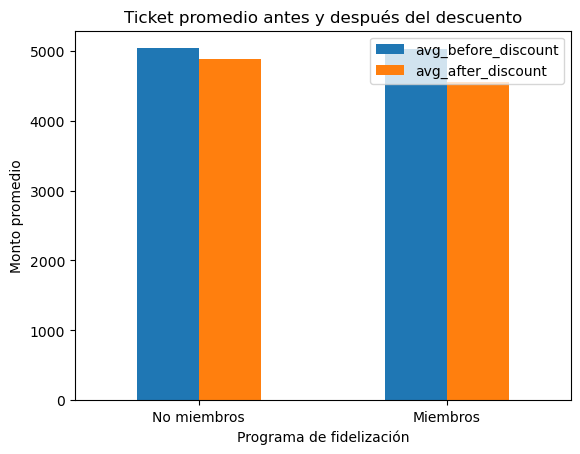

In [155]:
query = """
SELECT
    loyalty_program_member,
    AVG(total_purchase) AS avg_before_discount,
    AVG(total_purchase_after_discount) AS avg_after_discount
FROM sales_clean
GROUP BY loyalty_program_member;
"""

df_ticket = pd.read_sql_query(query, conn)
df_ticket


df_ticket['loyalty_program_member'] = df_ticket['loyalty_program_member'].map({
    0: 'No miembros',
    1: 'Miembros'
}) # Se renombran para que se lea mejor en el gráfico

df_ticket.set_index('loyalty_program_member')[
    ['avg_before_discount', 'avg_after_discount']
].round(0).plot(kind='bar')

plt.title('Ticket promedio antes y después del descuento')
plt.xlabel('Programa de fidelización')
plt.ylabel('Monto promedio')
plt.xticks(rotation=0)
plt.show()



### Interpretación: 
El impacto del programa de fidelización no se observa en un mayor gasto
por compra, sino en el beneficio económico otorgado al cliente. Para
evaluar su efectividad completa, es necesario analizar la frecuencia de
compra y el gasto acumulado por cliente.



### Conclusión del analisis:
Si bien los clientes fidelizados no presentan un mayor gasto bruto promedio
por compra, reciben descuentos significativamente mayores. Esto indica que
el programa opera principalmente como un mecanismo de beneficio económico
y no como un incentivo al aumento del ticket por orden.


## Efectividad del programa de fidelización

En el  análisis anterior se observa que el programa de fidelización no
impacta en un mayor gasto promedio por compra, sino en un mayor beneficio
económico otorgado al cliente. Sin embargo, esta métrica por sí sola no
permite evaluar la efectividad del programa.

Dado que el dataset cuenta con identificadores únicos de cliente, resulta
necesario analizar la frecuencia de compra y el gasto acumulado por cliente
para determinar si el programa genera mayor recurrencia y valor a largo plazo.


Para este análisis es importante traer los datos de recurrencia de clientes agrupados en si participan o no del programa de fidelidad. Una vez traidos se agrupan y se calcula el promedio de compras por tipo de cliente. 

In [181]:
query = """
SELECT
    user_id,
    loyalty_program_member,
    COUNT(*) AS total_purchases
FROM sales_clean
GROUP BY user_id, loyalty_program_member
"""

df_recurrence = pd.read_sql_query(query, conn) #Hasta acá, solo están los clientes y su total de compras agrupados en un DF

df_avg_recurrence = (
    df_recurrence
    .groupby("loyalty_program_member")["total_purchases"]
    .mean()
    .reset_index()
)

df_avg_recurrence["total_purchases"] = df_avg_recurrence["total_purchases"].round(2)

df_avg_recurrence



,loyalty_program_member,total_purchases
0,0,1.2
1,1,1.2


En base a las métricas analizadas (ticket promedio y recurrencia), el programa
de fidelización no muestra un impacto positivo en el comportamiento de compra
de los clientes. Su efecto se limita al otorgamiento de descuentos, sin
evidencia de un aumento en el volumen de compras ni en el gasto por transacción.


### Conclusión del analisis: 
El análisis muestra que el programa de fidelización no impacta ni en el gasto
promedio por compra ni en la recurrencia de los clientes, ya que ambos grupos
presentan métricas similares. La única diferencia observable es un mayor nivel
de descuentos otorgados a los clientes fidelizados.

En función de los datos disponibles, el programa actúa principalmente como un
mecanismo de beneficio económico para el cliente, sin evidencia de un retorno
directo para el comercio en términos de comportamiento de compra.


## Conclusión final:
A partir del análisis realizado, se observa que el programa de fidelización no
presenta un impacto significativo ni en el ticket promedio por compra ni en la
recurrencia de los clientes. Ambos grupos (fidelizados y no fidelizados)
muestran comportamientos de compra similares en términos de volumen y frecuencia.

La principal diferencia detectada es el mayor nivel de descuentos otorgados a
los clientes que participan del programa, sin evidencia de un retorno directo
para el comercio en las métricas analizadas. En función de los datos disponibles,
el programa actúa principalmente como un mecanismo de beneficio económico para
el cliente, sin generar cambios observables en su comportamiento de compra.


## Recomendaciones: 
En base a los resultados obtenidos, se proponen las siguientes recomendaciones:

1. Revisar la estructura de descuentos del programa, evaluando si los beneficios
   están alineados con comportamientos deseados como mayor frecuencia de compra
   o mayor gasto acumulado.

2. Introducir incentivos condicionados, por ejemplo:
   - descuentos progresivos por frecuencia
   - beneficios por gasto acumulado mensual o trimestral

3. Segmentar el programa de fidelización según el perfil del cliente, evitando
   otorgar descuentos uniformes a clientes con bajo impacto económico.

4. Incorporar métricas de seguimiento temporal (retención, cohortes) para evaluar
   el impacto del programa a mediano y largo plazo.


## Limitaciones: 
Este análisis se encuentra limitado por la falta de información temporal
detallada que permita evaluar la retención de clientes a lo largo del tiempo
o realizar análisis de cohortes. Asimismo, no se dispone de información sobre
costos operativos, lo que impide medir el impacto real del programa en la
rentabilidad del negocio.
